In [16]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [17]:
Images = [
{'File' :  0, 'TP' : 26, 'TN' :  2, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' :  2, 'TP' : 48, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0}, #
{'File' :  3, 'TP' : 48, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' :  9, 'TP' : 45, 'TN' :  2, 'FP' : 1, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' : 25, 'TP' :  3, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 7, 'UNN': 0},
{'File' : 27, 'TP' :  6, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' : 28, 'TP' : 14, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' : 29, 'TP' : 20, 'TN' : 18, 'FP' : 1, 'FN': 0, 'UNP': 2, 'UNN': 0},
 ]

In [18]:
df = pd.DataFrame(Images)
df

,File,TP,TN,FP,FN,UNP,UNN
0,0,26,2,0,0,0,0
1,2,48,0,0,0,0,0
2,3,48,0,0,0,0,0
3,9,45,2,1,0,0,0
4,25,3,0,0,0,7,0
5,27,6,0,0,0,0,0
6,28,14,0,0,0,0,0
7,29,20,18,1,0,2,0


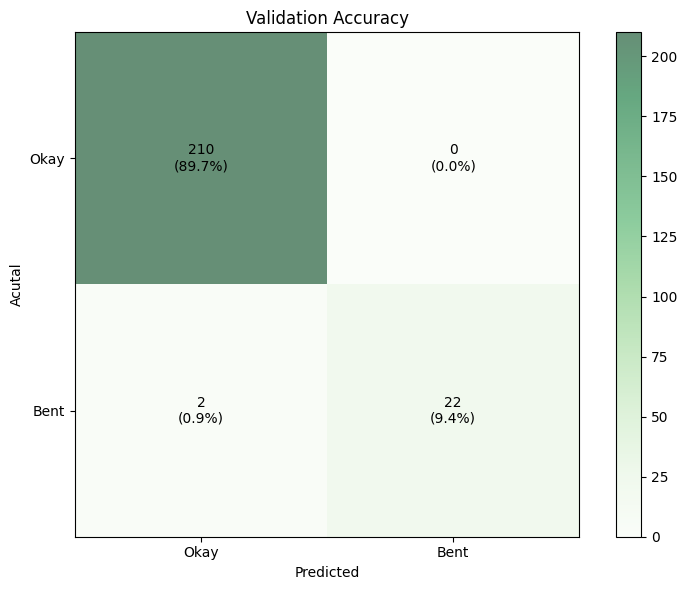

In [23]:
TP = df['TP'].sum()
TN = df['TN'].sum()
FP = df['FP'].sum()
FN = df['FN'].sum()

# Confusion matrix
confusion_matrix = np.array([[TP, FN], [FP, TN]])
grand_total = confusion_matrix.sum()
# Adjusted confusion matrix plot with extensions moved closer to the plot

def calculate_precision(confusion_matrix):
    """
    Calculate precision from a confusion matrix for a binary classification problem.

    Parameters:
    confusion_matrix (list of lists): A 2x2 confusion matrix in the form:
        [[TP, FN],
         [FP, TN]]

    Returns:
    float: Precision value.
    """
    # Extract values from the confusion matrix
    TP = confusion_matrix[0][0]  # True Positives
    FP = confusion_matrix[1][0]  # False Positives

    # Avoid division by zero
    if TP + FP == 0:
        return 0.0  # Precision is undefined if no predicted positives

    # Calculate precision
    precision = TP / (TP + FP)
    return precision
print(calculate_precision(confusion_matrix))

# Calculate recall, precision, F1 scores for each class
row_totals = confusion_matrix.sum(axis=1)
col_totals = confusion_matrix.sum(axis=0)
recall = np.diag(confusion_matrix) / row_totals
precision = np.diag(confusion_matrix) / col_totals
f1_score = 2 * (recall * precision) / (recall + precision)
f1_score = np.nan_to_num(f1_score)  # Replace NaN with 0 for clarity

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the main confusion matrix values
cax = ax.imshow(confusion_matrix, cmap="Greens", alpha=0.6)
plt.colorbar(cax)

# Annotate the matrix
for (i, j), val in np.ndenumerate(confusion_matrix):
    percentage = val / grand_total * 100
    ax.text(j, i, f"{val}\n({percentage:.1f}%)", ha="center", va="center", fontsize=10)

plt.xlabel("Predicted")
plt.ylabel("Acutal")
plt.title("Validation Accuracy")
plt.xticks([0, 1], labels=["Okay", "Bent"])
plt.yticks([0, 1], labels=["Okay", "Bent"])
plt.tight_layout()
plt.show()

In [13]:
import Levenshtein

def levenshtein_similarity(str1, str2):
    distance = Levenshtein.distance(str1, str2)
    max_len = max(len(str1), len(str2))
    return 1 - (distance / max_len)

labels_chat_gpt = [
    {'File' :  0, 'Predicted' : 'CY8C27443-24PVX12001B05CYP603161C', 'Truth': 'CY827443-24PVXI2001B05CYP603161',
     'Extra' : ''},
    {'File' :  1, 'Predicted' : '92AET6G3ADC0832CCN', 'Truth' : '92AET6G3ADC0832CCN',
     'Extra' : ''},
    {'File' :  3, 'Predicted' : 'STM32F103C8T61510JUMYS990099STe2', 'Truth' : 'STM32F103C8T6991UJ019UMYS99009',
     'Extra' : 'STe2'},
    {'File' :  2, 'Predicted' : 'STM32F10C87599LRX019UMYS9900B572', 'Truth' : 'STM32F103C8T6991RX019UMYS99008',
     'Extra' : '572'}
]

average = 0
average2 = 0
for labels in labels_chat_gpt:
    d = levenshtein_similarity(labels['Predicted'], labels['Truth'])
    average += d
    d2 = levenshtein_similarity(labels['Predicted'].replace(labels['Extra'], ""), labels['Truth'])
    average2 += d2
    print(f"For file {labels['File']}, distance is : {d}, removed extras: {d2}")
average /= len(labels_chat_gpt)
average2 /= len(labels_chat_gpt)
print(average, average2)

labels_apple_ocr_2 = [
    {'File' :  0, 'Predicted' : 'CY8C27443-24PVXI2001B05CYP603161', 'Truth': 'CY8C27443-24PVXI2001B05CYP603161',
     'Extra' : 'DC'},
    {'File' :  1, 'Predicted' : '92AET6G3ADC0832CCN', 'Truth' : '92AET6G3ADC0832CCN',
     'Extra' : ''},
    {'File' :  3, 'Predicted' : 'STM32F103C8T61510LJUMYS99009STe2', 'Truth' : 'STM32F103C8T6991UJ019UMYS99009',
     'Extra' : 'STe2'},
    {'File' :  2, 'Predicted' : 'STM32F103C7699LRX019UMYS9900B572', 'Truth' : 'STM32F103C8T6991RX019UMYS99008',
     'Extra' : ''}
]

average = 0
average2 = 0
for labels in labels_apple_ocr_2:
    d = levenshtein_similarity(labels['Predicted'], labels['Truth'])
    average += d
    d2 = levenshtein_similarity(labels['Predicted'].replace(labels['Extra'], ""), labels['Truth'])
    average2 += d2
    print(f"For file {labels['File']}, distance is : {d}, removed extras: {d2}")

average /= len(labels_apple_ocr_2)
average2 /= len(labels_apple_ocr_2)
print(average, average2)


For file 0, distance is : 0.9090909090909091, removed extras: 0.9090909090909091
For file 1, distance is : 1.0, removed extras: 1.0
For file 3, distance is : 0.65625, removed extras: 0.7666666666666666
For file 2, distance is : 0.75, removed extras: 0.8333333333333334
0.8288352272727273 0.8772727272727273
For file 0, distance is : 1.0, removed extras: 1.0
For file 1, distance is : 1.0, removed extras: 1.0
For file 3, distance is : 0.6875, removed extras: 0.8
For file 2, distance is : 0.78125, removed extras: 0.78125
0.8671875 0.8953125


In [2]:
levenshtein_similarity('C18627443-24PVXL2001BX05CYP603161', 'CY8C27443-24PVXI2001B05CYP603161')

0.8787878787878788

In [4]:
levenshtein_similarity('CY8C27443-24PVXI2001B05CYP603161', 'CY8C27443-24PVXI2001B05CYP603161')

1.0